# Intuit Quickbooks Upgrade

* Team-lead GitLab userid:
* Group name:
* Team member names:

## Setup

Please complete this python notebook with your group by answering the questions in `intuit-redux.pdf`. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML file from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the second group assignment for MGTA 455 and you will be using Git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's change to accept so the team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file 
* If you are going to work simultaneously, do it in different notebooks, e.g., 
    - model1.ipynb, model2.ipynb, model3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/git-group-workflow-wbg.png)

Tutorial videos about using Git, GitLab, and GitGadget for group assignments:

* Setup the MSBA server to use Git and GitLab: https://youtu.be/zJHwodmjatY
* Dealing with Merge Conflicts: https://youtu.be/qFnyb8_rgTI
* Group assignment practice: https://youtu.be/4Ty_94gIWeA

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

In [20]:
## loading the data - this dataset must NOT be changed
intuit75k = pd.read_pickle("data/intuit75k.pkl")
intuit75k["res1_yes"] = (intuit75k["res1"] == "Yes").astype(int)
intuit75k.head()

,id,zip,zip_bins,sex,bizflag,numords,dollars,last,sincepurch,version1,owntaxprod,upgraded,res1,training,res1_yes
0,1,94553,18,Male,0,2,109.5,5,12,0,0,0,No,1,0
1,2,53190,10,Unknown,0,1,69.5,4,3,0,0,0,No,0,0
2,3,37091,8,Male,0,4,93.0,14,29,0,0,1,No,0,0
3,4,02125,1,Male,0,1,22.0,17,1,0,0,0,No,1,0
4,5,60201,11,Male,0,1,24.5,2,3,0,0,0,No,0,0


In [21]:
# show dataset description
rsm.describe(intuit75k)

## Intuit: Quickbooks upgrade

The purpose of this exercise is to gain experience modeling the response to an upsell campaign. The `intuit75k.rds` file contains data on 75,000 (small) businesses that were selected randomly from the 801,821 that were sent the wave-1 mailing. The mailing contained an offer to upgrade to the latest version of the Quickbooks software. 

Variable `res1` denotes which of these businesses responded to the mailing by purchasing Quickbooks version 3.0 from Intuit Direct. Note that Intuit Direct sells products directly to its customers rather than through a retailer. Use the available data to predict which businesses that did not respond to the wave-1 mailing, are most likely to respond to the wave-2 mailing. Note that variables were added, deleted, and recoded so please ignore the variable descriptions in Exhibit 3 in the case in the course reader. Instead, use the variable descriptions below:

## Variable description

* id: Small business customer ID
* zip: 5-

In [22]:
# run python code from another notebook
%run ./sub-notebooks/model1.ipynb

      index     OR       OR%   2.5%  97.5% p.values     
1   numords  1.352   35.224%  1.313  1.392   < .001  ***
2  version1  2.113  111.278%  1.911  2.335   < .001  ***
3  upgraded  2.628  162.846%  2.388  2.894   < .001  ***


In [23]:
# importing functions from a module/package
from utils import functions
functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



## 1. Explore the data again

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

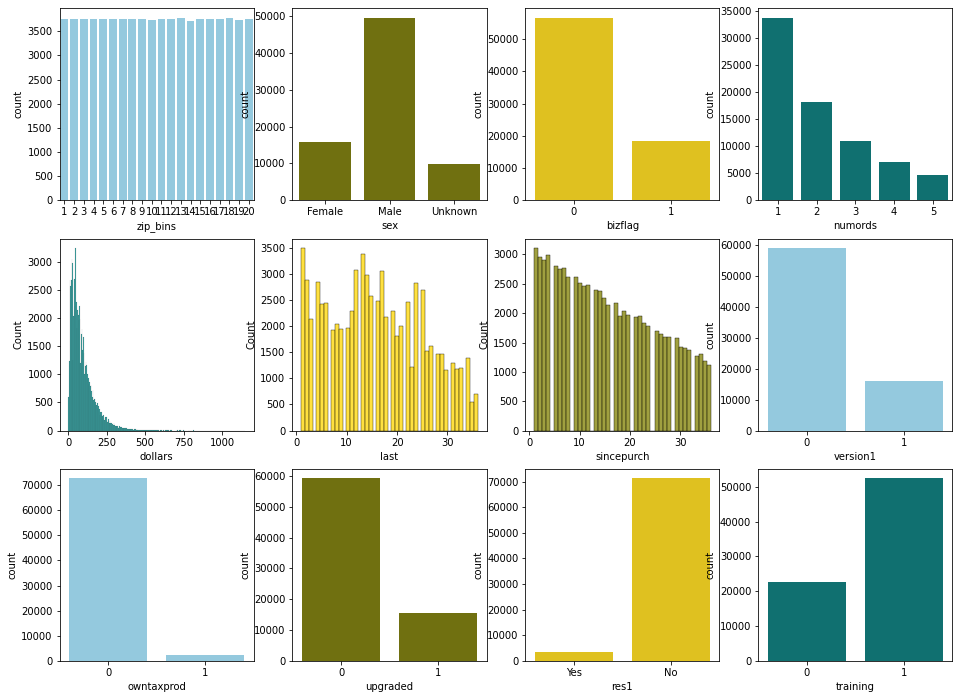

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
f, axes = plt.subplots(3, 4, figsize=(16, 12))#, sharex=True)

sns.countplot(intuit75k["zip_bins"], color="skyblue", ax=axes[0, 0])
sns.countplot(intuit75k['sex'], color="olive", ax=axes[0, 1])
sns.countplot(intuit75k['bizflag'], color="gold", ax=axes[0, 2])
sns.countplot(intuit75k['numords'], color="teal", ax=axes[0, 3])
sns.histplot(intuit75k['dollars'], color="teal", ax=axes[1, 0])
sns.histplot(intuit75k['last'], color="gold", ax=axes[1, 1])
sns.histplot(intuit75k['sincepurch'], color="olive", ax=axes[1, 2])
sns.countplot(intuit75k['version1'], color="skyblue", ax=axes[1, 3])
sns.countplot(intuit75k['owntaxprod'], color="skyblue", ax=axes[2, 0])
sns.countplot(intuit75k['upgraded'], color="olive", ax=axes[2, 1])
sns.countplot(intuit75k['res1'], color="gold", ax=axes[2, 2])
sns.countplot(intuit75k['training'], color="teal", ax=axes[2, 3])


plt.show()

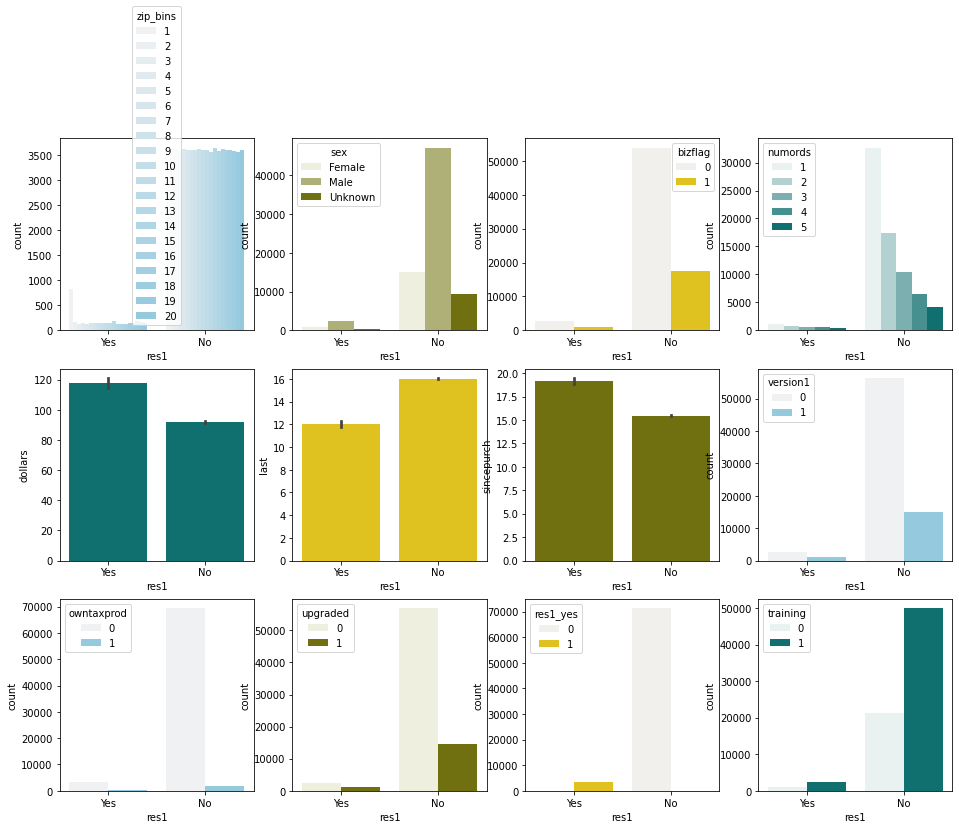

In [9]:
f, axes = plt.subplots(3, 4, figsize=(16, 12))#, sharex=True)

sns.countplot(x='res1', hue='zip_bins', data=intuit75k, color="skyblue", ax=axes[0, 0])
sns.countplot(x='res1', hue='sex', data=intuit75k, color="olive", ax=axes[0, 1])
sns.countplot(x='res1', hue='bizflag', data=intuit75k, color="gold", ax=axes[0, 2])
sns.countplot(x='res1', hue='numords', data=intuit75k, color="teal", ax=axes[0, 3])
sns.barplot(x='res1', y='dollars', data=intuit75k, color="teal", ax=axes[1, 0])
sns.barplot(x='res1', y='last', data=intuit75k, color="gold", ax=axes[1, 1])
sns.barplot(x='res1', y='sincepurch', data=intuit75k, color="olive", ax=axes[1, 2])
sns.countplot(x='res1', hue='version1', data=intuit75k, color="skyblue", ax=axes[1, 3])
sns.countplot(x='res1', hue='owntaxprod', data=intuit75k, color="skyblue", ax=axes[2, 0])
sns.countplot(x='res1', hue='upgraded', data=intuit75k, color="olive", ax=axes[2, 1])
sns.countplot(x='res1', hue='res1_yes', data=intuit75k, color="gold", ax=axes[2, 2])
sns.countplot(x='res1', hue='training', data=intuit75k, color="teal", ax=axes[2, 3])


plt.show()

## 2. Adjust input variables

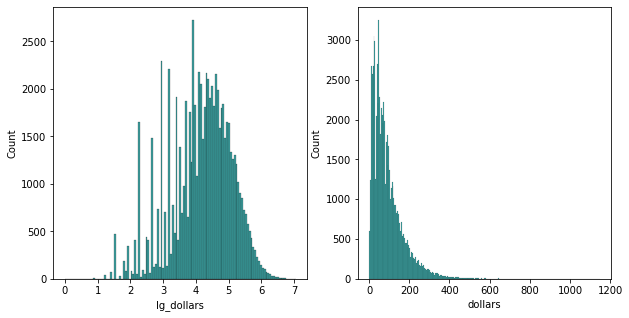

In [10]:
#zip bins & dollars
intuit75k['zip_bins_1'] = (intuit75k['zip_bins'] == 1).astype(int)
intuit75k['lg_dollars'] = np.log(intuit75k['dollars'])
intuit75k['zip_801'] = (intuit75k['zip'] =='00801').astype(int)
intuit75k['zip_804'] = (intuit75k['zip'] =='00804').astype(int)

f, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(intuit75k['lg_dollars'], color="teal", ax=axes[0])
sns.histplot(intuit75k['dollars'], color="teal", ax=axes[1])
plt.show()

In [11]:
# Create 3-factor label
intuit75k['only_ver02'] = np.where((intuit75k['upgraded'] == 0) & (intuit75k['version1'] == 0), 1, 0)
intuit75k['from_v1_to_v2'] = np.where((intuit75k['upgraded'] == 1) & (intuit75k['version1'] == 0), 1, 0)
intuit75k['only_ver01'] = np.where((intuit75k['upgraded'] == 0) & (intuit75k['version1'] == 1), 1, 0)

In [10]:
#breakeven & split the data
breakeven_rate = 1.41/60

train_cols = ['numords' , 'zip_bins_1', 'zip_801', 'zip_804', 'lg_dollars', 'last', 'only_ver02', 'from_v1_to_v2', 'only_ver01' ]
rvar = "res1_yes"
idvar = "id"

train_non = intuit75k[intuit75k['training'] == 1]
test_non = intuit75k[intuit75k['training'] == 0]

Xnon_train = train_non[train_cols].values
y_train = train_non[rvar].values
Xnon_test = test_non[train_cols].values
y_test = test_non[rvar].values

Xnon = intuit75k[train_cols].values

In [11]:
from sklearn.preprocessing import MinMaxScaler

evar_to_transfer = intuit75k[train_cols]#.values
scaler = MinMaxScaler()
intuit75k[train_cols] = scaler.fit_transform(evar_to_transfer)

In [12]:
train = intuit75k[intuit75k['training'] == 1]
test = intuit75k[intuit75k['training'] == 0]

X = intuit75k[train_cols].values
y = intuit75k[rvar].values

X_train = train[train_cols].values
X_test = test[train_cols].values

test_result = test[['id', 'res1']].copy() #store the model results

In [28]:
def pref_calc_ad(perc_mail, rep_rate):
    nr_mail = (22500-1103) * perc_mail
    nr_resp = nr_mail* rep_rate *0.5
    revenue = nr_resp * 60 
    mail_cost = nr_mail * 1.41
    profit = revenue  - mail_cost
    ROME = profit / mail_cost 
    return ( f"""the number of businesses to mail is {int(nr_mail):,} ({round((100 * perc_mail), 2)}%). The response rate for the selected customers is predicted to be {round((100 * rep_rate), 2)}% or {int(nr_resp):,} buyers. The revenue is equal to ${int(revenue):,}. The expected profit is ${int(profit):,}. The marginal cost is estimated to be ${int(mail_cost):,} with a ROME of {round((100 * ROME), 2)}%""")

## 3. Redo Logistic Regression

In [14]:
lr_mod= smf.glm(
    formula="res1_yes ~ numords  + zip_bins_1 + zip_801 + zip_804 + lg_dollars + last + only_ver02 + from_v1_to_v2 + only_ver01  ",
    family=Binomial(link=logit()),
    data=intuit75k[intuit75k['training']==1],
)
lr_sel = lr_mod.fit()
lr_sel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               res1_yes   No. Observations:                52500
Model:                            GLM   Df Residuals:                    52491
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8585.7
Date:                Wed, 17 Feb 2021   Deviance:                       17171.
Time:                        19:12:46   Pearson chi2:                 5.23e+04
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.4122      0.095    -25.295      0.000      -2.599      -2.225
numords           1.0499      0.081     12.910      0.000       0.891       1.209
zip_bins_1       -0.1513      0.152     -0.994      0.320      -0.450       0.147
zip_801           3.2315      0.164     19.748      0.000       2.911       3.552
zip_804           2.9078      0.249     11.698      0.000       2.421       3.395
lg_dollars        0.5966      0.221      2.700      0.007       0.163       1.030
last             -1.5943      0.087    -18.379      0.000      -1.764      -1.424
only_ver02       -1.4257      0.043    -32.900      0.000      -1.511      -1.341
from_v1_to_v2    -0.3648      0.044     -8.236      0.000      -0.452      -0.278
only_ver01       -0.6217      0.046    -13.573      0.000      -0.712      -0.532
=================================================================================
"""

In [18]:
pred_lr = lr_sel.predict(test)

test_result['prob_lg'] = pred_lr
test_result['pred_lg'] = (pred_lr/2 > breakeven_rate)

perc = test_result['pred_lg'].mean()
resp = functions.response_rate(test_result[test_result['pred_lg']==True]['res1'], lev='Yes')


In [19]:
print(f"""By logistic regression model, {pref_calc_ad(perc, resp)}""")

By logistic regression model, the number of businesses to mail is 6,260 (29.26%). The response rate for the selected customers is predicted to be 11.36% or 355 buyers. The revenue is equal to $21,339. The expected profit is $12,512. The marginal cost is estimated to be $8,827 with a ROME of 141.76%


#### Logistic regression result
The expected profit (446,995) is higher than our highest expected profit of logistic regression last time (321k)

In [20]:
#last weeks function
functions.pref_calc_logit(perc, resp)

'the number of businesses to mail is 223,334 (29.26%). The response rate for the selected customers is predicted to be 11.36% or 25,376 buyers. The revenue is equal to $761,298. The expected profit is $446,396. The marginal cost is estimated to be $314,901 with a ROME of 141.76%'

## 4. Keras Neural Network

In [21]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [22]:
predictors = X_train.copy()
target = to_categorical(train['res1_yes'])
n_cols = predictors.shape[1]

predict_data = X_test.copy()
test_label = to_categorical(test['res1_yes'])

### Neural Network Model 1 (100 nodes, 6 layers)

In [23]:
from numpy.random import seed
seed(1234)
import tensorflow
tensorflow.random.set_seed(122)


model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, epochs=20,           
          callbacks = [early_stopping_monitor])

Epoch 1/20
1149/1149 [==============================] - 12s 10ms/step - loss: 0.1927 - accuracy: 0.9469 - val_loss: 0.1633 - val_accuracy: 0.9528
Epoch 2/20
1149/1149 [==============================] - 9s 8ms/step - loss: 0.1684 - accuracy: 0.9513 - val_loss: 0.1634 - val_accuracy: 0.9515
Epoch 3/20
1149/1149 [==============================] - 10s 8ms/step - loss: 0.1659 - accuracy: 0.9525 - val_loss: 0.1642 - val_accuracy: 0.9528


In [24]:
predictions_k1 = model.predict(predict_data)
probability_true_k1 = predictions_k1[:,1]

test_result['prob_k1'] = probability_true_k1
test_result['pred_k1'] = probability_true_k1/2 > breakeven_rate

perc_nn = test_result['pred_k1'].mean()
rep_nn = functions.response_rate(test_result[test_result['pred_k1']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['pred_k1'], test_result['res1'])
conf_nn

res1,Yes,No
pred_k1,,
False,419,16693
True,684,4704


In [25]:
print(f"""By Keras neural network model 1, with 100 nodes, {pref_calc_ad(perc_nn, rep_nn)}""")

By Keras neural network model 1, with 100 nodes, the number of businesses to mail is 5,123 (23.95%). The response rate for the selected customers is predicted to be 12.69% or 325 buyers. The revenue is equal to $19,514. The expected profit is $12,289. The marginal cost is estimated to be $7,224 with a ROME of 170.1%


### Neural Network Model 2 (200 nodes, 6 layers)

In [26]:
from numpy.random import seed
seed(122)
import tensorflow
tensorflow.random.set_seed(122)

model = Sequential()
model.add(Dense(200, activation='relu', input_shape = (n_cols,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, epochs=20,           
          callbacks = [early_stopping_monitor])

Epoch 1/20
1149/1149 [==============================] - 11s 9ms/step - loss: 0.1816 - accuracy: 0.9535 - val_loss: 0.1626 - val_accuracy: 0.9528
Epoch 2/20
1149/1149 [==============================] - 10s 9ms/step - loss: 0.1690 - accuracy: 0.9513 - val_loss: 0.1621 - val_accuracy: 0.9540
Epoch 3/20
1149/1149 [==============================] - 11s 9ms/step - loss: 0.1660 - accuracy: 0.9532 - val_loss: 0.1636 - val_accuracy: 0.9533
Epoch 4/20
1149/1149 [==============================] - 13s 12ms/step - loss: 0.1656 - accuracy: 0.9516 - val_loss: 0.1647 - val_accuracy: 0.9535


In [27]:
predictions_k2 = model.predict(predict_data)
probability_true_k2 = predictions_k2[:,1]

test_result['prob_k2'] = probability_true_k2
test_result['pred_k2'] = probability_true_k2/2 > breakeven_rate


perc_nn = test_result['pred_k2'].mean()
rep_nn = functions.response_rate(test_result[test_result['pred_k2']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['pred_k2'], test_result['res1'])
conf_nn

res1,Yes,No
pred_k2,,
False,252,12884
True,851,8513


In [28]:
print(f"""By neural network model 2, with 200 nodes, {pref_calc_ad(perc_nn, rep_nn)}""")

By neural network model 2, with 200 nodes, the number of businesses to mail is 8,904 (41.62%). The response rate for the selected customers is predicted to be 9.09% or 404 buyers. The revenue is equal to $24,278. The expected profit is $11,722. The marginal cost is estimated to be $12,555 with a ROME of 93.36%


### Neural Network Model 3 (200 nodes, 5 layers)

In [29]:
from numpy.random import seed
seed(122)
import tensorflow
tensorflow.random.set_seed(122)

model = Sequential()
model.add(Dense(200, activation='relu', input_shape = (n_cols,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, epochs=20,           
          callbacks = [early_stopping_monitor])

Epoch 1/20
1149/1149 [==============================] - 9s 7ms/step - loss: 0.1831 - accuracy: 0.9469 - val_loss: 0.1631 - val_accuracy: 0.9539
Epoch 2/20
1149/1149 [==============================] - 9s 8ms/step - loss: 0.1686 - accuracy: 0.9518 - val_loss: 0.1624 - val_accuracy: 0.9536
Epoch 3/20
1149/1149 [==============================] - 10s 9ms/step - loss: 0.1658 - accuracy: 0.9532 - val_loss: 0.1638 - val_accuracy: 0.9532
Epoch 4/20
1149/1149 [==============================] - 11s 9ms/step - loss: 0.1652 - accuracy: 0.9519 - val_loss: 0.1636 - val_accuracy: 0.9535


In [30]:
predictions_k3 = model.predict(predict_data)
probability_true_k3 = predictions_k3[:,1]

test_result['prob_k3'] = probability_true_k3
test_result['pred_k3'] = probability_true_k3/2 > breakeven_rate


perc_nn = test_result['pred_k3'].mean()
rep_nn = functions.response_rate(test_result[test_result['pred_k3']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['pred_k3'], test_result['res1'])
conf_nn

res1,Yes,No
pred_k3,,
False,286,13848
True,817,7549


In [73]:
print(f"""By neural network model 3, with 200 nodes, {pref_calc_ad(perc_nn, rep_nn)}""")

By neural network model 3, with 200 nodes, the number of businesses to mail is 8,006 (37.42%). The response rate for the selected customers is predicted to be 9.67% or 387 buyers. The revenue is equal to $23,222. The expected profit is $11,934. The marginal cost is estimated to be $11,288 with a ROME of 105.72%


### Neural Network Model 4 (100 nodes, 7 layers)

In [31]:
from numpy.random import seed
seed(122)
import tensorflow
tensorflow.random.set_seed(122)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, epochs=20,           
          callbacks = [early_stopping_monitor])

Epoch 1/20
1149/1149 [==============================] - 9s 7ms/step - loss: 0.1888 - accuracy: 0.9538 - val_loss: 0.1628 - val_accuracy: 0.9528
Epoch 2/20
1149/1149 [==============================] - 10s 9ms/step - loss: 0.1687 - accuracy: 0.9513 - val_loss: 0.1629 - val_accuracy: 0.9528
Epoch 3/20
1149/1149 [==============================] - 10s 9ms/step - loss: 0.1664 - accuracy: 0.9515 - val_loss: 0.1640 - val_accuracy: 0.9528


In [32]:
predictions_k4 = model.predict(predict_data)
probability_true_k4 = predictions_k4[:,1]

test_result['prob_k4'] = probability_true_k4
test_result['pred_k4'] = probability_true_k4/2 > breakeven_rate


perc_nn = test_result['pred_k4'].mean()
rep_nn = functions.response_rate(test_result[test_result['pred_k4']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['pred_k4'], test_result['res1'])
conf_nn

res1,Yes,No
pred_k4,,
False,427,16786
True,676,4611


In [33]:
print(f"""By neural network model 4, with 100 nodes, {pref_calc_ad(perc_nn, rep_nn)}""")

By neural network model 4, with 100 nodes, the number of businesses to mail is 5,027 (23.5%). The response rate for the selected customers is predicted to be 12.79% or 321 buyers. The revenue is equal to $19,285. The expected profit is $12,196. The marginal cost is estimated to be $7,089 with a ROME of 172.04%


### Neural Network Model 5 (200 nodes, 4 layers)

In [34]:
from numpy.random import seed
seed(122)
import tensorflow
tensorflow.random.set_seed(122)

model = Sequential()
model.add(Dense(200, activation='relu', input_shape = (n_cols,)))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, epochs=20,           
          callbacks = [early_stopping_monitor])

Epoch 1/20
1149/1149 [==============================] - 8s 7ms/step - loss: 0.1788 - accuracy: 0.9533 - val_loss: 0.1635 - val_accuracy: 0.9533
Epoch 2/20
1149/1149 [==============================] - 8s 7ms/step - loss: 0.1683 - accuracy: 0.9515 - val_loss: 0.1623 - val_accuracy: 0.9530
Epoch 3/20
1149/1149 [==============================] - 8s 7ms/step - loss: 0.1653 - accuracy: 0.9530 - val_loss: 0.1636 - val_accuracy: 0.9533
Epoch 4/20
1149/1149 [==============================] - 9s 8ms/step - loss: 0.1650 - accuracy: 0.9519 - val_loss: 0.1630 - val_accuracy: 0.9543


In [35]:
predictions_k5 = model.predict(predict_data)
probability_true_k5 = predictions_k5[:,1]

test_result['prob_k5'] = probability_true_k5
test_result['pred_k5'] = probability_true_k5/2 > breakeven_rate


perc_nn = test_result['pred_k5'].mean()
rep_nn = functions.response_rate(test_result[test_result['pred_k5']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['pred_k5'], test_result['res1'])
conf_nn

res1,Yes,No
pred_k5,,
False,300,14269
True,803,7128


In [36]:
print(f"""By neural network model 5, with 100 nodes, {pref_calc_ad(perc_nn, rep_nn)}""")

By neural network model 5, with 100 nodes, the number of businesses to mail is 7,542 (35.25%). The response rate for the selected customers is predicted to be 10.12% or 381 buyers. The revenue is equal to $22,909. The expected profit is $12,274. The marginal cost is estimated to be $10,634 with a ROME of 115.42%


## 5. MLP Neural Network

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance


#### MLP Model 1: hlsize = (1,), alpha = 0.01

In [38]:
clf_m1 = MLPClassifier(activation = "tanh",
                       solver = "lbfgs",
                       alpha = 0.01,
                       hidden_layer_sizes = (1,),
                       random_state = 1234,
                       max_iter = 1000).fit(X_train, y_train)

In [39]:
test_result['prob_m1'] = clf_m1.predict_proba(X_test)[:,1]
test_result['pred_m1'] = test_result['prob_m1']/2 > breakeven_rate

perc_mlp = test_result['pred_m1'].mean()
rep_mlp = functions.response_rate(test_result[test_result['pred_m1']==True]['res1'], lev='Yes')

conf_mlp = pd.crosstab(test_result['pred_m1'], test_result['res1'])
conf_mlp

res1,Yes,No
pred_m1,,
False,373,15915
True,730,5482


In [40]:
print(f'''With 1-node MLP model: {pref_calc_ad(perc_mlp, rep_mlp)}''')

With 1-node MLP model: the number of businesses to mail is 5,907 (27.61%). The response rate for the selected customers is predicted to be 11.75% or 347 buyers. The revenue is equal to $20,826. The expected profit is $12,496. The marginal cost is estimated to be $8,329 with a ROME of 150.03%


#### MLP Model 2: hlsize = (2,), alpha = 0.01

In [41]:
clf_m2 = MLPClassifier(activation = "tanh",
                       solver = "lbfgs",
                       alpha = 0.01,
                       hidden_layer_sizes = (2,),
                       random_state = 1234,
                       max_iter = 1000).fit(X_train, y_train)

In [42]:
test_result['prob_m2'] = clf_m2.predict_proba(X_test)[:,1]
test_result['pred_m2'] = test_result['prob_m2']/2 > breakeven_rate

perc_mlp = test_result['pred_m2'].mean()
rep_mlp = functions.response_rate(test_result[test_result['pred_m2']==True]['res1'], lev='Yes')

conf_mlp = pd.crosstab(test_result['pred_m2'], test_result['res1'])
conf_mlp

res1,Yes,No
pred_m2,,
False,355,15481
True,748,5916


In [43]:
print(f'''With 2 node and 2 hidden layers' MLP model: {pref_calc_ad(perc_mlp, rep_mlp)}''')

With 2 node and 2 hidden layers' MLP model: the number of businesses to mail is 6,337 (29.62%). The response rate for the selected customers is predicted to be 11.22% or 355 buyers. The revenue is equal to $21,339. The expected profit is $12,404. The marginal cost is estimated to be $8,935 with a ROME of 138.82%


#### MLP Model3: Grid Search

In [44]:
mlp = MLPClassifier(activation="tanh",
                       solver="lbfgs",
                       alpha=0.01,
                       hidden_layer_sizes=(1,),
                       random_state=1234,
                       max_iter=1000,
                      )#.fit(X_train, y_train)

nr_hnodes = range(1, 5)
hls = list(zip(nr_hnodes)) + list(zip(nr_hnodes, nr_hnodes))

param_grid_mlp = {"hidden_layer_sizes": hls, 
                  "alpha": [0.001, 0.01, 0.05]}

scoring = {"AUC": "roc_auc"}

clf_cv = GridSearchCV(mlp, 
                      param_grid_mlp, 
                      scoring=scoring, 
                      cv=5, 
                      n_jobs=4, 
                      refit="AUC", 
                      verbose=5)

clf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh', alpha=0.01,
                                     hidden_layer_sizes=(1,), max_iter=1000,
                                     random_state=1234, solver='lbfgs'),
             n_jobs=4,
             param_grid={'alpha': [0.001, 0.01, 0.05],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (1, 1),
                                                (2, 2), (3, 3), (4, 4)]},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

Best parameters found:  {'alpha': 0.01, 'hidden_layer_sizes': (2,)}
Best AUC found:  0.7701917499006051


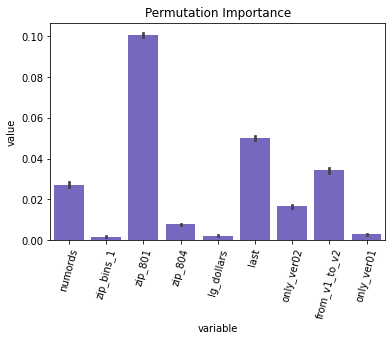

In [45]:
def importance(clf, X, y):
    imp = permutation_importance(clf, X, y, scoring='roc_auc', n_repeats=10, random_state=1234)
    
    data = pd.DataFrame(imp.importances.T)
    data.columns = train_cols
    fig = sns.barplot(x="variable", y='value', color='slateblue', data=pd.melt(data))
    fig.set_xticklabels(fig.get_xticklabels(), rotation=75)
    fig.set(title ='Permutation Importance')
    
print("Best parameters found: ", clf_cv.best_params_)
print("Best AUC found: ", clf_cv.best_score_)

importance(clf_cv, X_train, y_train)

In [46]:
pred_mlp = clf_cv.predict_proba(X_test)

test_result['prob_m3'] = pred_mlp[:,1]
test_result['pred_m3'] = test_result['prob_m3']/2 > breakeven_rate

perc_mlp = test_result['pred_m3'].mean()
rep_mlp = functions.response_rate(test_result[test_result['pred_m3']==True]['res1'], lev='Yes')

conf_mlp = pd.crosstab(test_result['pred_m3'], test_result['res1'])
conf_mlp

res1,Yes,No
pred_m3,,
False,355,15481
True,748,5916


In [47]:
print(f'''With 2 node and 2 hidden layers' MLP model: {pref_calc_ad(perc_mlp, rep_mlp)}''')

With 2 node and 2 hidden layers' MLP model: the number of businesses to mail is 6,337 (29.62%). The response rate for the selected customers is predicted to be 11.22% or 355 buyers. The revenue is equal to $21,339. The expected profit is $12,404. The marginal cost is estimated to be $8,935 with a ROME of 138.82%


In [52]:
#test_result

## 6. XGBoost Classifier

### Untuned XGBoost

In [49]:
import xgboost as xgb

xg_cl_0 = xgb.XGBClassifier(objective='binary:logistic',
                          n_estimators=10, seed=122)

xg_cl_0.fit(Xnon_train, y_train)
preds_0 = xg_cl_0.predict_proba(Xnon_test)
#accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
#print("accuracy: %f" % (accuracy))

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:29:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [50]:
test_result['prob_xgb1'] = preds_0[:,1]
test_result['pred_xgb1'] = test_result['prob_xgb1']/2 > breakeven_rate

perc_nn_0 = test_result['pred_xgb1'].mean()
rep_nn_0 = functions.response_rate(test_result[test_result['pred_xgb1']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['pred_xgb1'], test_result['res1'])
conf_nn

res1,Yes,No
pred_xgb1,,
False,216,11071
True,887,10326


In [51]:
print(f"""By untuned XGBoost model, {pref_calc_ad(perc_nn_0, rep_nn_0)}""")

By untuned XGBoost model, the number of businesses to mail is 10,663 (49.84%). The response rate for the selected customers is predicted to be 7.91% or 421 buyers. The revenue is equal to $25,305. The expected profit is $10,270. The marginal cost is estimated to be $15,035 with a ROME of 68.31%


### Tuning using GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    "objective":['reg:logistic'],
    'colsample_bytree': [0.3, 0.7, 1],
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 5, 7, 10],
    'eta':[0.01,0.1,0.5,0.9]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBClassifier(use_label_encoder = False)

# Perform grid search: grid_mse
grid_auc = GridSearchCV(estimator=gbm, 
                        param_grid=gbm_param_grid, 
                        scoring='roc_auc', cv=4, verbose=1)


# Fit grid_mse to the data
grid_auc.fit(Xnon_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_auc.best_params_)
print("Best ROC_AUC found: ", grid_auc.best_score_)

Fitting 4 folds for each of 144 candidates, totalling 576 fits
Best parameters found:  {'colsample_bytree': 1, 'eta': 0.1, 'max_depth': 2, 'n_estimators': 100, 'objective': 'reg:logistic'}
Best ROC_AUC found:  0.7686777885912552


In [60]:
preds_1 = grid_auc.predict_proba(Xnon_test)


test_result['prob_xgb2'] = preds_1[:,1]
test_result['pred_xgb2'] = test_result['prob_xgb2']/2 > breakeven_rate

perc_xgb = test_result['pred_xgb2'].mean()
rep_xgb = functions.response_rate(test_result[test_result['pred_xgb2']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['pred_xgb2'], test_result['res1'])
conf_nn

res1,Yes,No
pred_xgb2,,
False,365,15896
True,738,5501


In [61]:
print(f"""By tuned XGBoost model, {pref_calc_ad(perc_xgb, rep_xgb)}""")

By tuned XGBoost model, the number of businesses to mail is 5,933 (27.73%). The response rate for the selected customers is predicted to be 11.83% or 350 buyers. The revenue is equal to $21,054. The expected profit is $12,688. The marginal cost is estimated to be $8,365 with a ROME of 151.68%


## 7. Random forest classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]



In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc_param_grid = {
    "max_features" : ['auto', 'sqrt'],
    'n_estimators': [50, 100],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]

}


# Instantiate the regressor: gbm
rfc = RandomForestClassifier(random_state=122)

# Perform grid search: grid_mse
grid_auc_rfc = GridSearchCV(estimator=rfc, 
                        param_grid=rfc_param_grid, 
                        scoring='roc_auc', cv=4, verbose=1)


# Fit grid_mse to the data
grid_auc_rfc.fit(Xnon_train, y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_auc_rfc.best_params_)
print("Best ROC_AUC found: ", grid_auc_rfc.best_score_)

Fitting 4 folds for each of 144 candidates, totalling 576 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best ROC_AUC found:  0.7660988482161141


In [65]:
preds_r = grid_auc_rfc.predict_proba(Xnon_test)

test_result['prob_rfc1'] = preds_r[:,1]
test_result['pred_rfc1'] = test_result['prob_rfc1']/2 > breakeven_rate

perc_nn = test_result['pred_rfc1'].mean()
rep_nn = functions.response_rate(test_result[test_result['pred_rfc1']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['pred_rfc1'], test_result['res1'])
conf_nn

res1,Yes,No
pred_rfc1,,
False,356,15289
True,747,6108


In [66]:
print(f"""By Random Forest model, {pref_calc_ad(perc_nn, rep_nn)}""")

By Random Forest model, the number of businesses to mail is 6,518 (30.47%). The response rate for the selected customers is predicted to be 10.9% or 355 buyers. The revenue is equal to $21,311. The expected profit is $12,119. The marginal cost is estimated to be $9,191 with a ROME of 131.85%


In [16]:
#data=pd.read_csv("test_result_all.csv")
#data[['prob_xgb2', 'pred_xgb2', 'prob_rfc1', 'pred_rfc1']]


In [17]:
#test_result.loc[:, 'prob_xgb2'] = data['prob_xgb2'].values
#test_result.loc[:, 'pred_xgb2'] = data['pred_xgb2'].values
#test_result.loc[:, 'prob_rfc1'] = data['prob_rfc1'].values
#test_result.loc[:, 'pred_rfc1'] = data['pred_rfc1'].values
#test_result
#test_result

## 7. Decision tree classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree

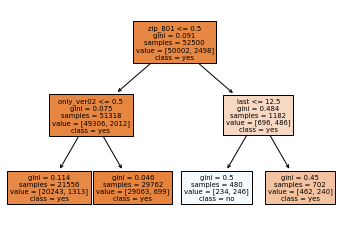

In [68]:
dt = DecisionTreeClassifier(max_depth=2, 
                           random_state=1234).fit(Xnon_train, y_train)
fig = tree.plot_tree(dt, 
                     feature_names=train_cols, 
                     class_names=["yes", "no"], 
                     filled=True)

In [69]:
dt_clf = DecisionTreeClassifier(max_depth=3, 
                           random_state=1234).fit(Xnon_train, y_train)

test_result['prob_dt1'] = dt_clf.predict_proba(Xnon_test)[:,1]
test_result['pred_dt1'] = test_result['prob_dt1']/2 > breakeven_rate

perc_dt = test_result['pred_dt1'].mean()
rep_dt = functions.response_rate(test_result[test_result['pred_dt1']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['pred_dt1'], test_result['res1'])
conf_nn

res1,Yes,No
pred_dt1,,
False,295,12269
True,808,9128


<AxesSubplot:title={'center':'Features Importances'}>

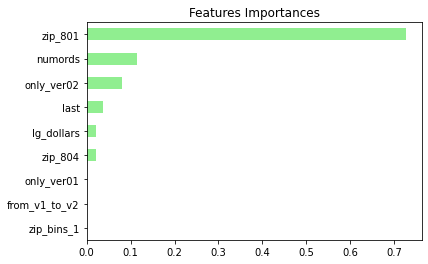

In [70]:
dt_importance = pd.Series(data=dt_clf.feature_importances_, index=train_cols)
dt_importance_sorted = dt_importance.sort_values()
dt_importance_sorted.plot(kind='barh', 
                          color='lightgreen', 
                          title='Features Importances')

In [71]:
print(f"""By untuned decision tree model, {pref_calc_ad(perc_dt, rep_dt)}""")

By untuned decision tree model, the number of businesses to mail is 9,448 (44.16%). The response rate for the selected customers is predicted to be 8.13% or 384 buyers. The revenue is equal to $23,051. The expected profit is $9,728. The marginal cost is estimated to be $13,322 with a ROME of 73.02%


In [72]:
dt_param_grid = {'max_depth': list(range(2, 20))}

clf_dt = DecisionTreeClassifier(max_depth=20)#.fit(X_train, y_train)

grid_auc_dt = GridSearchCV(clf_dt, 
                           dt_param_grid, 
                           scoring=scoring, 
                           cv=5, 
                           n_jobs=4, 
                           refit="AUC", 
                           verbose=5).fit(Xnon_train, y_train)

print("Tuned Parameters: {}".format(grid_auc_dt.best_params_))
print("Best score is {}".format(grid_auc_dt.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Tuned Parameters: {'max_depth': 6}
Best score is 0.750051568855375


In [73]:
test_result['prob_dt2'] = grid_auc_dt.predict_proba(Xnon_test)[:,1]
test_result['pred_dt2'] = test_result['prob_dt2']/2 > breakeven_rate


perc_dt = test_result['pred_dt2'].mean()
rep_dt = functions.response_rate(test_result[test_result['pred_dt2']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['pred_dt2'], test_result['res1'])
conf_nn

res1,Yes,No
pred_dt2,,
False,351,15011
True,752,6386


In [74]:
print(f"""By tuned decision tree model, {pref_calc_ad(perc_dt, rep_dt)}""")

By tuned decision tree model, the number of businesses to mail is 6,788 (31.72%). The response rate for the selected customers is predicted to be 10.54% or 357 buyers. The revenue is equal to $21,454. The expected profit is $11,882. The marginal cost is estimated to be $9,571 with a ROME of 124.15%


## Comparing model performance

In [95]:
#test_result = pd.read_csv("test_result.csv")
models = []
for col in test_result.columns:
    if col[0:4] == 'prob':
        models.append(col)
models

['prob_lg',
 'prob_k1',
 'prob_k2',
 'prob_k3',
 'prob_k4',
 'prob_k5',
 'prob_m1',
 'prob_m2',
 'prob_m3',
 'prob_xgb1',
 'prob_xgb2',
 'prob_rfc1',
 'prob_dt1',
 'prob_dt2']

In [96]:
# summarize performance across all models in test set
test_result['res1_yes'] = (test_result['res1'] =='Yes').astype(int)
rsm.evalbin(test_result, "res1_yes", 1, models, cost=1.41, margin=30)

,Type,predictor,TP,FP,TN,FN,total,TPR,TNR,precision,Fscore,accuracy,kappa,profit,index,ROME,contact,AUC
0,All,prob_lg,748,5835,15562,355,22500,0.678,0.727,0.114,0.195,0.725,0.121,13157.97,0.978,1.418,0.293,0.763
1,All,prob_k1,684,4704,16693,419,22500,0.620,0.780,0.127,0.211,0.772,0.141,12922.92,0.960,1.701,0.239,0.759
2,All,prob_k2,851,8513,12884,252,22500,0.772,0.602,0.091,0.163,0.610,0.082,12326.76,0.916,0.934,0.416,0.765
3,All,prob_k3,817,7549,13848,286,22500,0.741,0.647,0.098,0.173,0.652,0.094,12713.94,0.945,1.078,0.372,0.764
4,All,prob_k4,676,4611,16786,427,22500,0.613,0.785,0.128,0.212,0.776,0.142,12825.33,0.953,1.720,0.235,0.760
5,All,prob_k5,803,7128,14269,300,22500,0.728,0.667,0.101,0.178,0.670,0.100,12907.29,0.959,1.154,0.352,0.764
6,All,prob_m1,730,5482,15915,373,22500,0.662,0.744,0.118,0.200,0.740,0.127,13141.08,0.977,1.500,0.276,0.763
7,All,prob_m2,748,5916,15481,355,22500,0.678,0.724,0.112,0.193,0.721,0.118,13043.76,0.969,1.388,0.296,0.763
8,All,prob_m3,748,5916,15481,355,22500,0.678,0.724,0.112,0.193,0.721,0.118,13043.76,0.969,1.388,0.296,0.763
9,All,prob_xgb1,887,10326,11071,216,22500,0.804,0.517,0.079,0.144,0.531,0.060,10799.67,0.803,0.683,0.498,0.761


In [26]:
avg_mod = ['prob_k5', 'prob_m1', 'prob_xgb2', 'prob_rfc1', 'prob_dt2']
breakeven_rate = 1.41/60
test_result['avg_prob'] = test_result[avg_mod].sum(axis=1)/len(avg_mod)
test_result['avg_pred'] = test_result['avg_prob']/2 > breakeven_rate

perc_avg = test_result['avg_pred'].mean()
rep_avg = functions.response_rate(test_result[test_result['avg_pred']==True]['res1'], lev='Yes')

conf_nn = pd.crosstab(test_result['avg_pred'], test_result['res1'])
conf_nn

res1,No,Yes
avg_pred,,
False,15692,344
True,5705,759


In [29]:
print(f"""By average all model, {pref_calc_ad(perc_avg, rep_avg)}""")

By average all model, the number of businesses to mail is 6,147 (28.73%). The response rate for the selected customers is predicted to be 11.74% or 360 buyers. The revenue is equal to $21,653. The expected profit is $12,986. The marginal cost is estimated to be $8,667 with a ROME of 149.83%


In [133]:
#test_result.to_csv("test_result_new.csv", index=False)

In [25]:
#test_result=pd.read_csv("test_result_new.csv")

In [42]:
#test_result['mailto_wave2'] = (test_result['avg_pred'] == True) & (test_result['res1'] == 'No')# & (test_result['avg_pred'] == True)
#mail = test_result[['id','mailto_wave2']].to_csv('mailto_wave2.csv', index = False)


In [44]:
#len(test_result[['id','mailto_wave2']])

22500